# 1. Importing libraries

In [1]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np

# Plots
# -----------------------------------------------------------------------  
import seaborn as sns
import matplotlib.pyplot as plt

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None
 
# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore")

# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import *

# 2. Data loading

In [2]:
df = pd.read_csv('../data/processed/orders_clusters.csv', index_col=0)

df.head()

,ShipMode,OrderPriority,NumberOfProducts,TotalSales,TotalQuantity,TotalProfit,TotalShippingCost,cluster
OrderID,,,,,,,,
AE-2011-9160,Standard Class,Medium,2,161.082,8,-246.078,9.56,0
AE-2013-1130,Same Day,High,2,228.996,7,-236.964,60.18,0
AE-2013-1530,Second Class,High,2,23.634,3,-38.076,3.16,0
AE-2014-2840,First Class,Critical,1,42.480,1,-75.060,8.04,0
AE-2014-3830,Standard Class,Medium,6,281.502,16,-429.108,19.38,1


In [3]:
df['cluster'].unique()

array([0, 1])

In [4]:
df_0 = df[df['cluster'] == 0]
df_1 = df[df['cluster'] == 1]

# 3. Analysis

## 3.1 Numeric columns

### Whole dataframe

In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
NumberOfProducts,25035.0,2.05,1.47,1.00,1.00,2.00,3.00,14.00
TotalSales,25035.0,504.99,807.07,0.56,63.51,206.82,615.58,23661.23
TotalQuantity,25035.0,7.12,6.16,1.00,3.00,5.00,9.00,58.00
TotalProfit,25035.0,58.62,275.30,-6892.37,0.00,20.07,89.17,8762.39
TotalShippingCost,25035.0,54.04,95.96,0.00,5.72,19.47,59.64,2076.62
cluster,25035.0,0.03,0.18,0.00,0.00,0.00,0.00,1.00


### Cluster 0

In [6]:
df_0.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
NumberOfProducts,24218.0,2.00,1.42,1.00,1.00,1.00,3.00,14.00
TotalSales,24218.0,480.98,774.81,0.56,60.94,194.61,572.59,18336.74
TotalQuantity,24218.0,6.91,5.96,1.00,3.00,5.00,9.00,58.00
TotalProfit,24218.0,81.73,230.11,-336.63,1.67,22.32,93.39,8762.39
TotalShippingCost,24218.0,51.42,93.24,0.00,5.43,18.13,55.66,2076.62
cluster,24218.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Cluster 1

In [7]:
df_1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
NumberOfProducts,817.0,3.49,2.11,1.00,2.00,3.00,5.00,13.00
TotalSales,817.0,1216.95,1281.50,99.83,522.11,886.96,1545.09,23661.23
TotalQuantity,817.0,13.55,8.09,1.00,7.00,12.00,18.00,45.00
TotalProfit,817.0,-626.45,517.68,-6892.37,-727.70,-461.97,-345.62,83.29
TotalShippingCost,817.0,131.68,135.16,0.25,45.04,87.12,159.69,1041.10
cluster,817.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00


Our initial suspicion was that one cluster contains orders generating profits, while the other does not.  

This is confirmed by examining the total profit values:  

- Cluster 0: Profits range from -337 to 8763. More than 75% of the data is above 0.  

- Cluster 1: Profits range from -6893 to 84. More than 75% of the data is below 0.

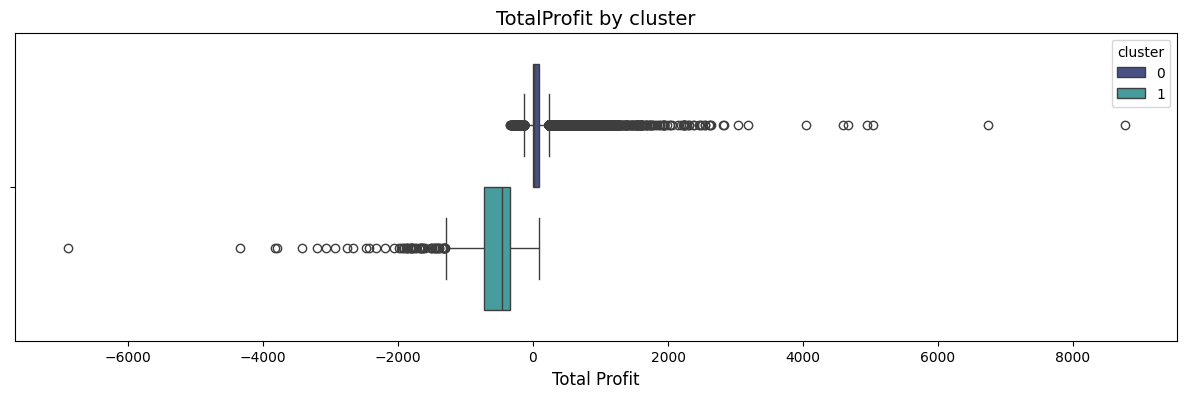

In [8]:
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, hue='cluster', x='TotalProfit', palette='mako')

plt.title('TotalProfit by cluster', fontsize=14)
plt.xlabel('Total Profit', fontsize=12)
plt.ylabel('')

plt.show()

The graph clearly illustrates this distinction.

## 3.2 Categoric columns

In [9]:
cat_cols = df.select_dtypes(include=['O', 'category']).columns.to_list()

### Whole dataframe

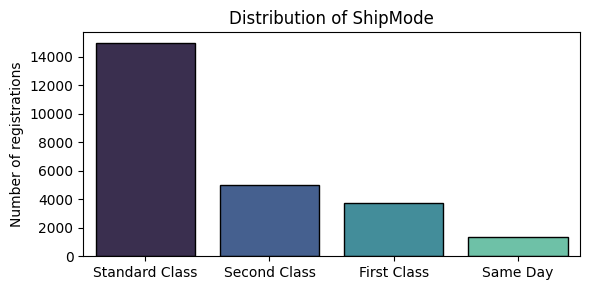

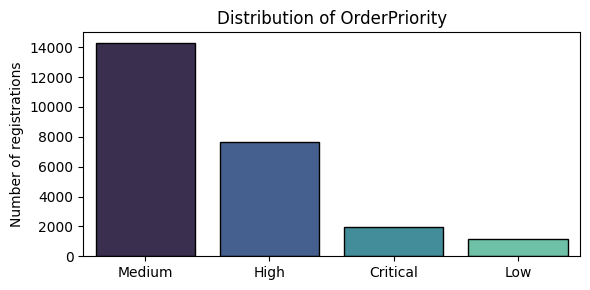

In [10]:
for col in cat_cols:

    if df[col].nunique() > 10:
        rot = 90
        size = (8, 6)

    else: 
        rot = 0
        size = (6, 3)

    plot_categoric_distribution(df, col, size=size, rotation=rot)

### Cluster 0

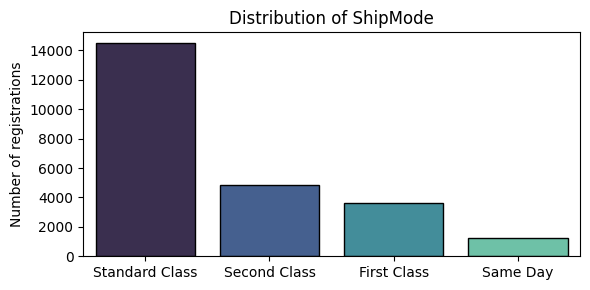

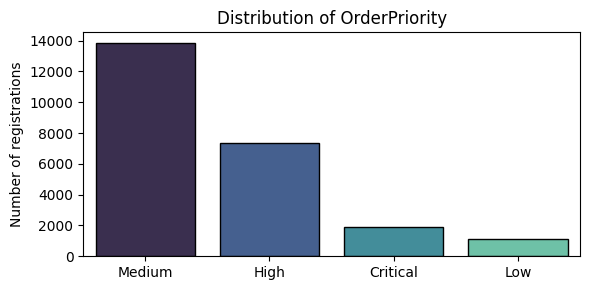

In [11]:
for col in cat_cols:

    if df[col].nunique() > 10:
        rot = 90
        size = (8, 6)

    else: 
        rot = 0
        size = (6, 3)

    plot_categoric_distribution(df_0, col, size=size, rotation=rot)

### Cluster 1

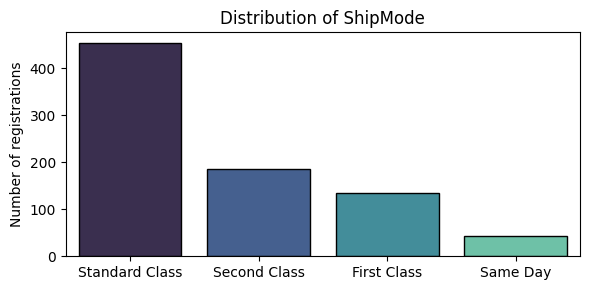

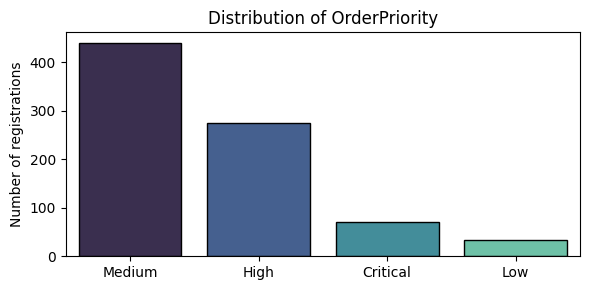

In [12]:
for col in cat_cols:

    if df[col].nunique() > 10:
        rot = 90
        size = (8, 6)

    else: 
        rot = 0
        size = (6, 3)

    plot_categoric_distribution(df_1, col, size=size, rotation=rot)

The distributions of the categorical variables do not appear to differ between clusters. This aligns with what was observed in the clustering.

## 3.3 Outliers

### Whole dataframe

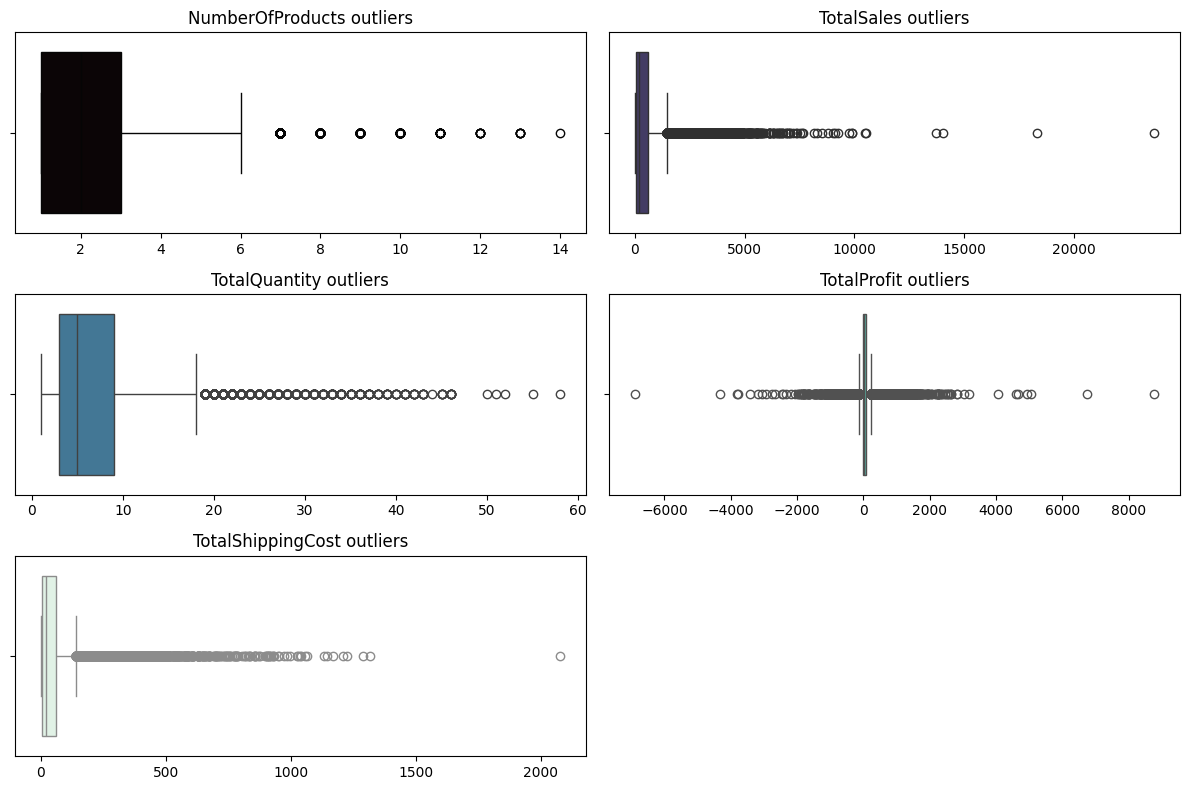

In [13]:
plot_outliers(df.drop(columns='cluster'), size = (12, 8))

### Cluster 0

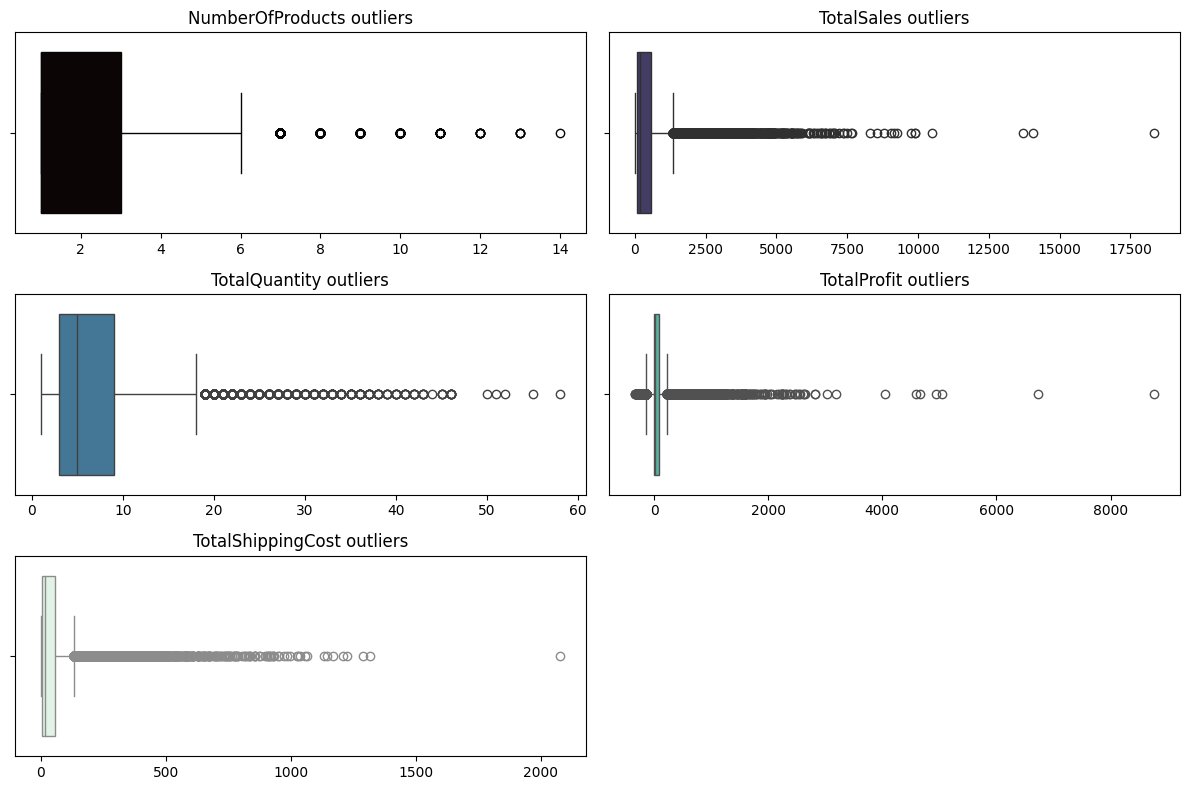

In [14]:
plot_outliers(df_0.drop(columns='cluster'), size = (12, 8))

### Cluster 1

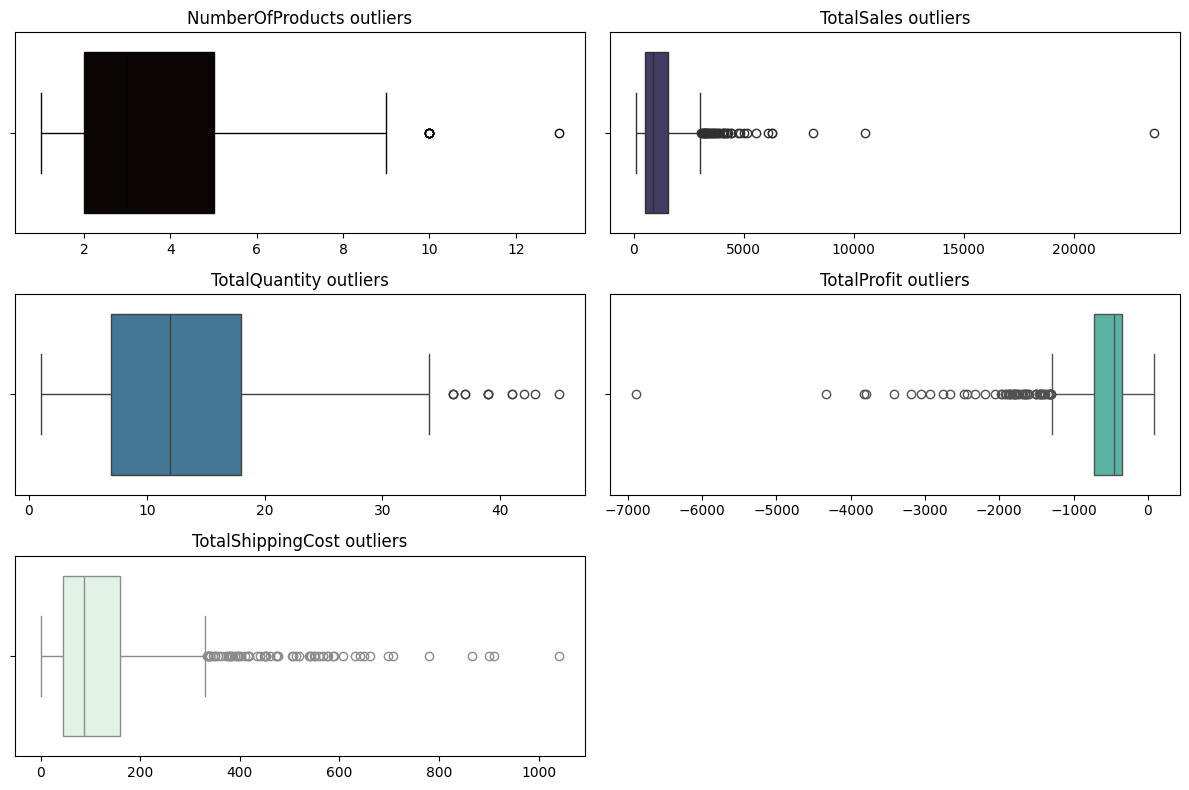

In [15]:
plot_outliers(df_1.drop(columns='cluster'), size = (12, 8))

The distribution changes slightly between clusters, with the exception of total profit, which follows the previously mentioned pattern.

## 3.4 Correlation Matrix

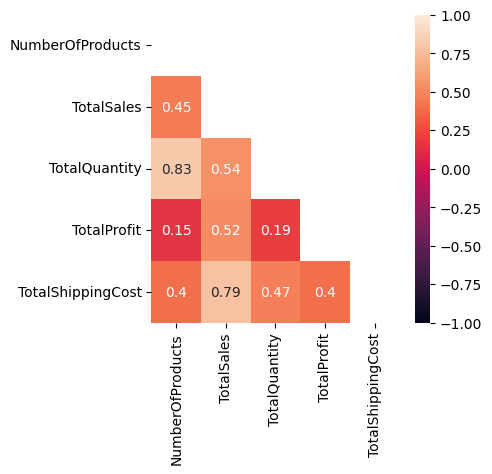

In [16]:
plot_correlation_matrix(df.drop(columns='cluster'), size=(4,4))

### Cluster 0

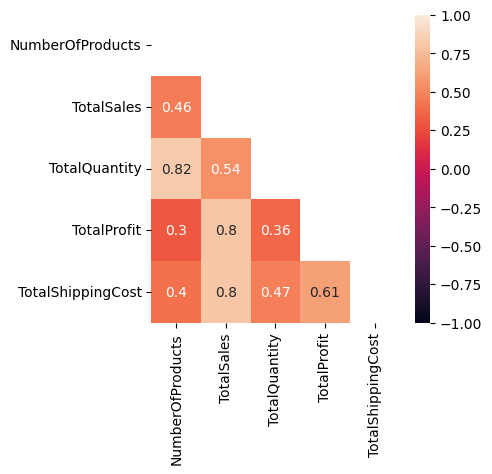

In [17]:
plot_correlation_matrix(df_0.drop(columns='cluster'), size=(4,4))

### Cluster 1

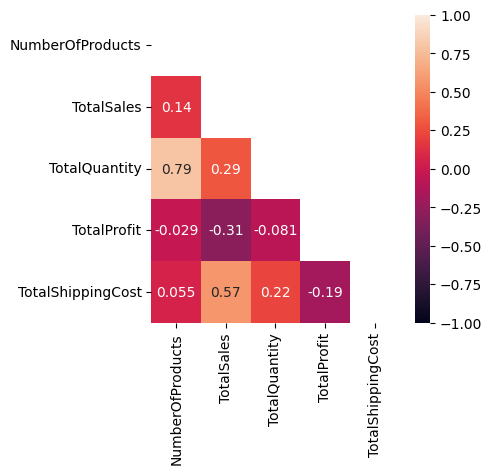

In [18]:
plot_correlation_matrix(df_1.drop(columns='cluster'), size=(4,4))

We observe that the correlation changes significantly between the two clusters.  

- In cluster 0, the correlations observed in the total dataset are amplified.  

- In cluster 1, the strong positive correlation between revenue and profit turns negative, which is a serious issue for the business. These orders require further investigation.

## 3.5 Cluster comparison

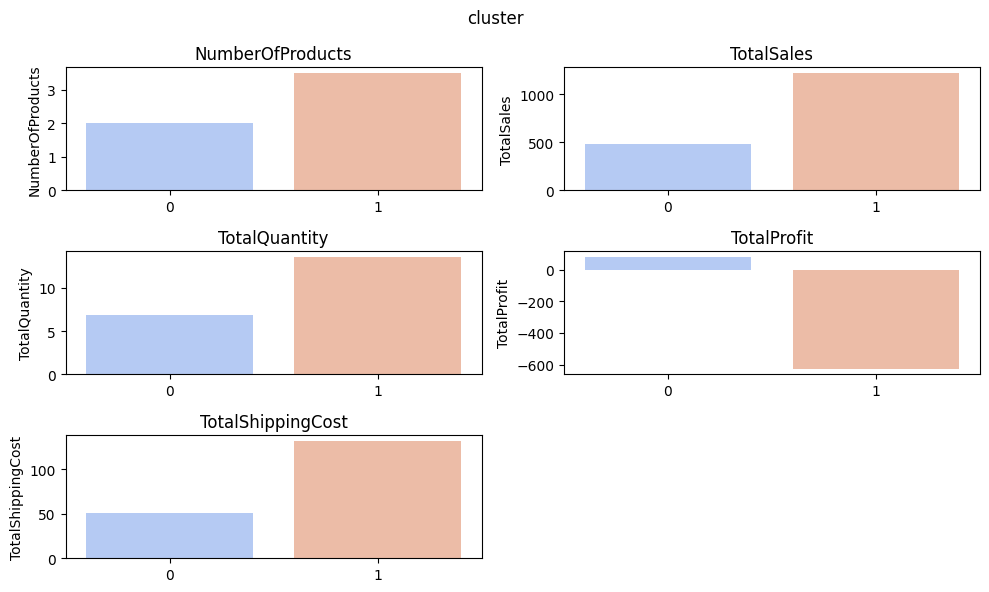

In [19]:
num_cols = df.select_dtypes(include=np.number).drop(columns='cluster').columns

plot_groupby(df, 'cluster', num_cols, size=(10, 6), method='mean')

This graph once again highlights the difference between the clusters, showing that while cluster 0 performs worse in most aspects, it excels in what truly matters: profits.